In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import dlib
import face_recognition

In [2]:
image_filenames = sorted(glob('../../img_align_celeba/*'))
len(image_filenames)

202599

In [3]:
test_img_filename = image_filenames[0]
test_img = face_recognition.load_image_file(test_img_filename)
face_locations = face_recognition.face_locations(test_img)

In [4]:
np.shape(test_img)

(218, 178, 3)

In [5]:
face_locations

[(86, 135, 176, 46)]

In [6]:
def get_mask_from_face_locations(img, loc):
    mask = np.ones_like(img)
    if not loc:
        return mask
    loc = loc[0]
    mask[loc[0]:loc[2],loc[3]:loc[1],:] = np.zeros_like(mask[loc[0]:loc[2],loc[3]:loc[1],:])
    return mask

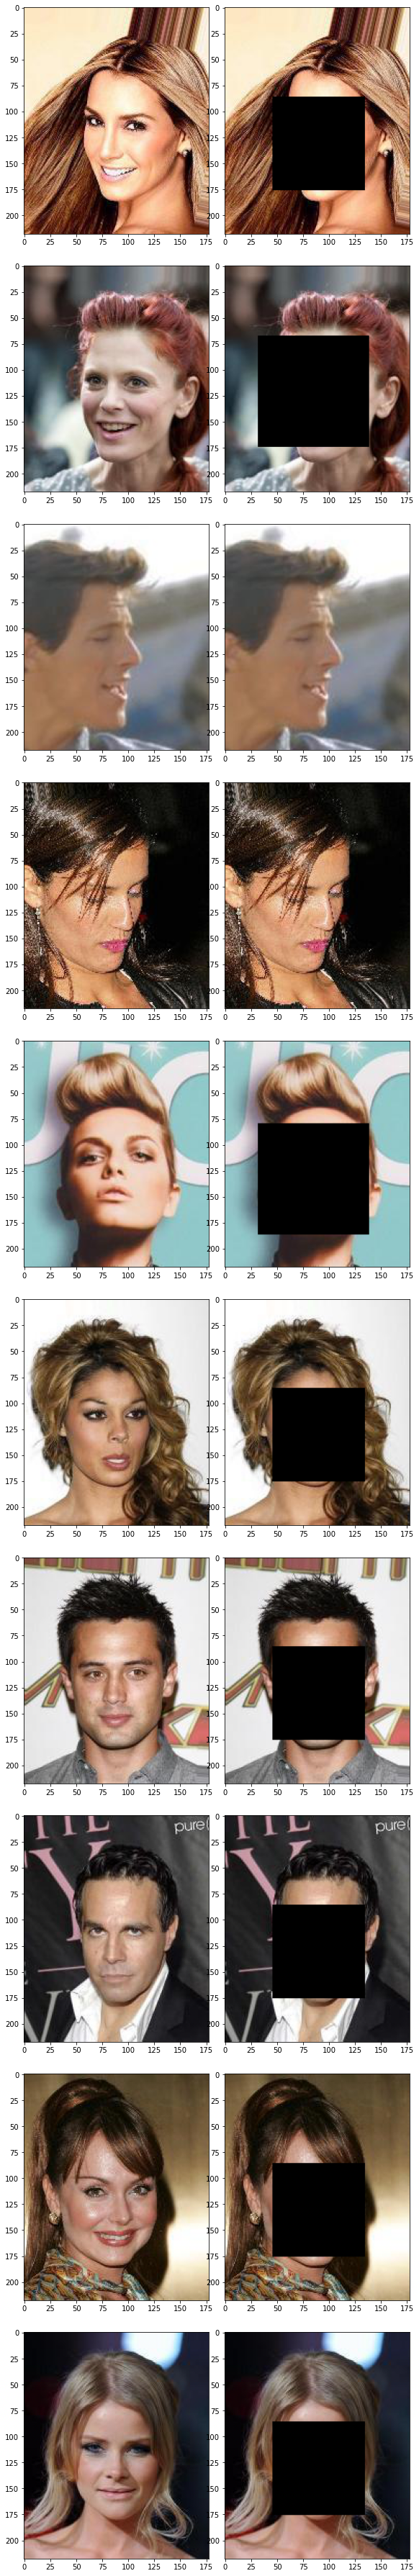

In [7]:
num = 10
fig, axs = plt.subplots(num, 2)
fig.set_size_inches(8, 5*num)
for i in range(num):
    test_img_filename = image_filenames[i]
    test_img = face_recognition.load_image_file(test_img_filename)
    face_locations = face_recognition.face_locations(test_img)
    test_mask = get_mask_from_face_locations(test_img, face_locations)
    axs[i,0].imshow(test_img)
    axs[i,1].imshow(test_img * test_mask)

plt.tight_layout()
plt.savefig("face_mask_noDL.jpg")

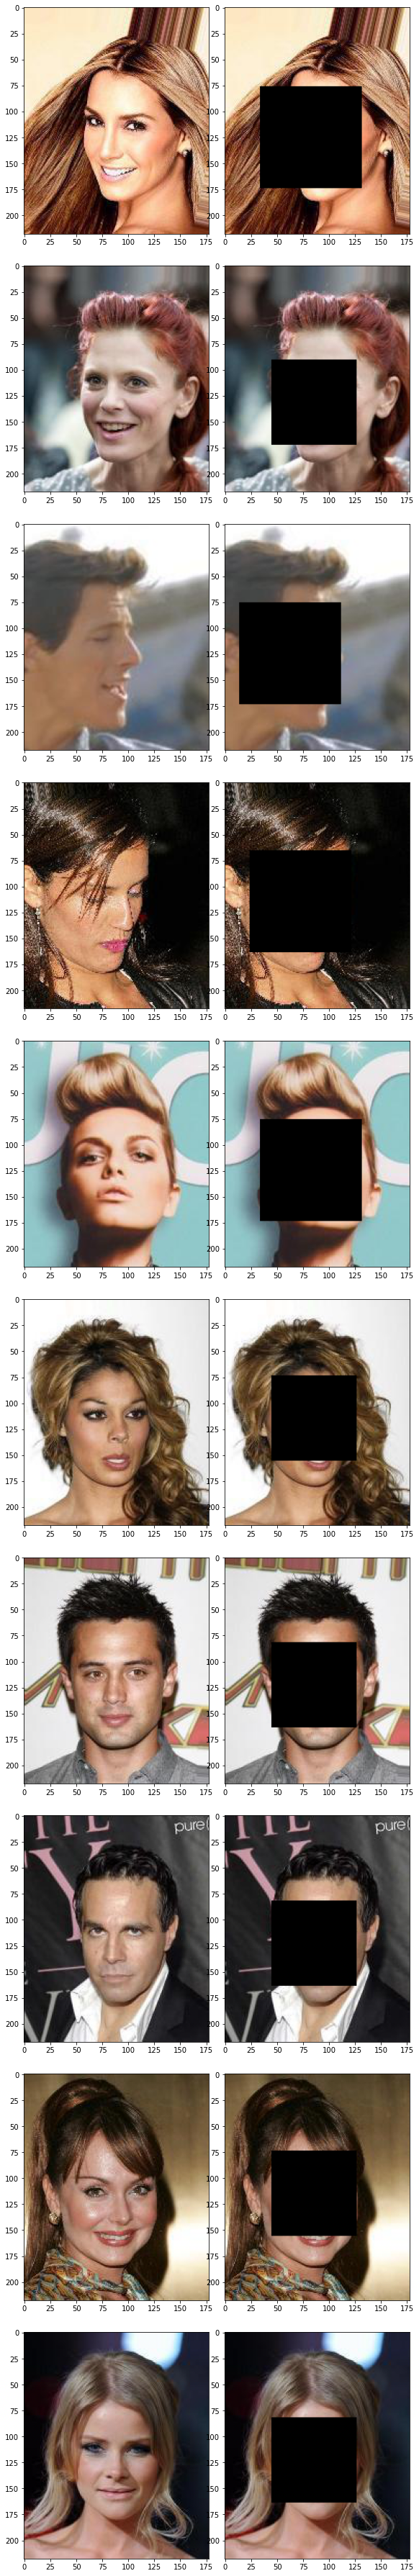

In [8]:
num = 10
fig, axs = plt.subplots(num, 2)
fig.set_size_inches(8, 5*num)
for i in range(num):
    test_img_filename = image_filenames[i]
    test_img = face_recognition.load_image_file(test_img_filename)
    face_locations = face_recognition.face_locations(test_img, model="cnn")
    test_mask = get_mask_from_face_locations(test_img, face_locations)
    axs[i,0].imshow(test_img)
    axs[i,1].imshow(test_img * test_mask)

plt.tight_layout()
plt.savefig("face_mask_withDL.jpg")

In [9]:
# num = 2
# fig, axs = plt.subplots(num, 2)
# fig.set_size_inches(50*num,100)
# test_img_filename = image_filenames[0]
# test_img = face_recognition.load_image_file(test_img_filename)
# face_locations = face_recognition.face_locations(test_img)
# test_mask = get_mask_from_face_locations(test_img, face_locations)
# axs[0,0].imshow(test_img)
# axs[0,1].imshow(test_img * test_mask)

# test_img_filename = image_filenames[1]
# test_img = face_recognition.load_image_file(test_img_filename)
# face_locations = face_recognition.face_locations(test_img)
# test_mask = get_mask_from_face_locations(test_img, face_locations)
# axs[1,0].imshow(test_img)
# axs[1,1].imshow(test_img * test_mask)

# plt.tight_layout()